# EDA
- check absence of predictors
- check data type
- check missing data, nans and outliers
- check data range
- check imbalance data or skewed data
- any predictors analysis

In [1]:
import pandas as pd
import numpy as np
import yaml
import os
import tqdm
import src.util as util

import matplotlib.pyplot as plt
import seaborn as sns

# 1. Load Config and Train Datset

In [2]:
# load config
config_data = util.load_config()

# load train dataset
x_train = util.pickle_load(config_data["train_set_path"]["x"])
y_train = util.pickle_load(config_data["train_set_path"]["y"])
dataset = pd.concat([x_train, y_train], axis=1)

dataset.head(5)

,Department,JobRole,Gender,JobLevel,Age,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,MonthlyIncome,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,PerformanceRating,Attrition
853,Research & Development,Research Scientist,Male,1,19,1,1,0,0,2552,3,1,3,4,No
435,Research & Development,Manager,Male,3,33,7,6,7,7,13610,2,3,4,3,Yes
587,Research & Development,Laboratory Technician,Female,2,52,5,2,1,4,3149,4,3,3,4,No
1170,Research & Development,Research Scientist,Male,1,27,4,2,1,2,2580,4,4,2,3,No
159,Sales,Sales Representative,Female,1,34,4,3,1,2,2231,3,3,3,3,No


# 2. Check Missing Value

In [3]:
dataset.isnull().sum()

Department                 0
JobRole                    0
Gender                     0
JobLevel                   0
Age                        0
YearsAtCompany             0
YearsInCurrentRole         0
YearsSinceLastPromotion    0
YearsWithCurrManager       0
MonthlyIncome              0
EnvironmentSatisfaction    0
JobSatisfaction            0
WorkLifeBalance            0
PerformanceRating          0
Attrition                  0
dtype: int64

# 3. Label Distribution

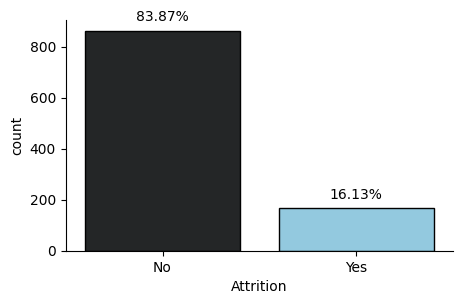

In [30]:
plt.figure(figsize=(5,3))
ax = sns.countplot(data=dataset, x='Attrition', hue='Attrition', palette='dark:skyblue', edgecolor='black')
total_height = len(dataset)
for p in ax.patches:
    height = p.get_height()
    percentage = (height / total_height) * 100
    ax.annotate(f'{percentage:.2f}%', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')
sns.despine()
plt.show()

# 4. Variable Distribution toward Label 

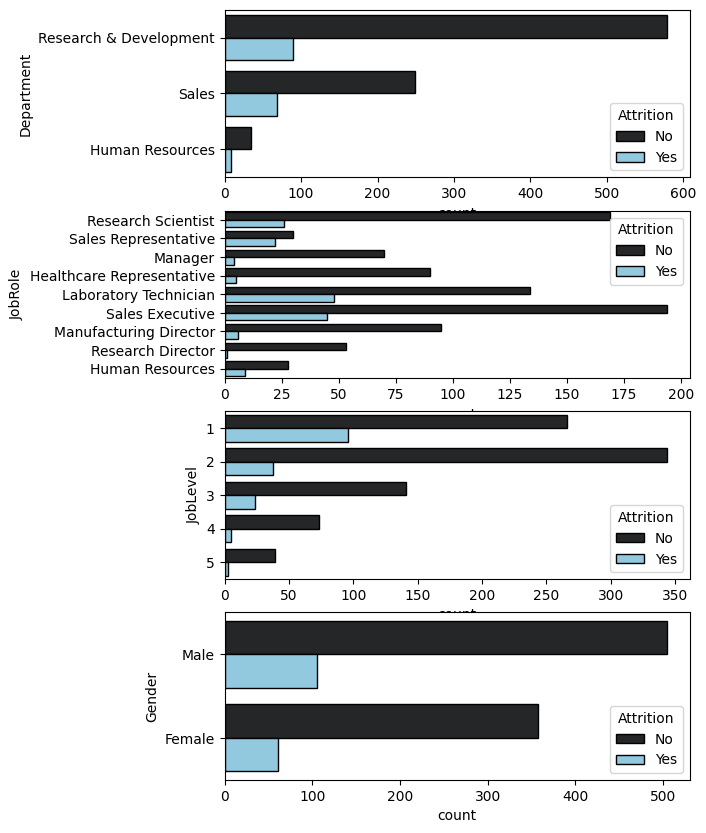

In [31]:
fig, axs = plt.subplots(4,1,figsize=(6,10))
i = 0
cols = ['Department', 'JobRole', 'JobLevel', 'Gender']

for col in cols:
    sns.countplot(ax=axs[i], data=dataset.sort_values(by='Attrition'), y=col, hue='Attrition', palette='dark:skyblue', edgecolor='black')
    i=i+1

plt.show()

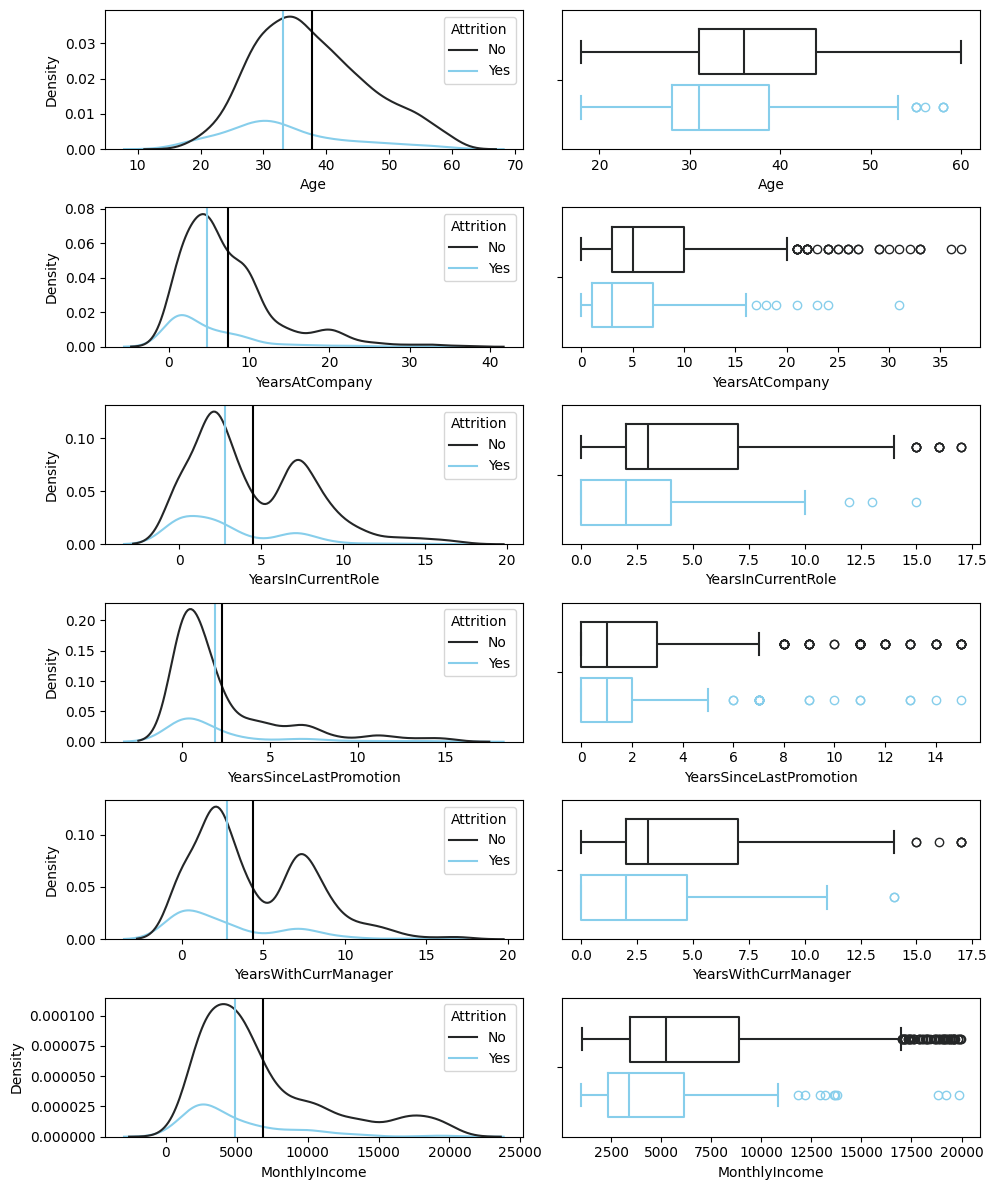

In [7]:
fig, axs = plt.subplots(6,2,figsize=(10,12))
i = 0
cols = ['Age', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager', 'MonthlyIncome']

for col in cols:
    x = col

    sns.kdeplot(ax=axs[i,0], data=dataset, x=x, hue='Attrition', palette='dark:skyblue', fill=False)
    axs[i,0].axvline(dataset[dataset['Attrition'] == 'Yes'][x].mean(), 0, 1, color = "skyblue")
    axs[i,0].axvline(dataset[dataset['Attrition'] == 'No'][x].mean(), 0, 1, color = "black")

    sns.boxplot(ax=axs[i,1], data=dataset, x=x, hue='Attrition', palette='dark:skyblue', gap=0.2, fill=False)
    axs[i,1].legend().set_visible(False)

    i=i+1

plt.tight_layout()

In [8]:
from scipy.stats import ttest_ind

cols = ['Age', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager', 'MonthlyIncome']
results = []

for col in cols:
    t_statistic, p_value = ttest_ind(dataset[dataset['Attrition']=='Yes'][col], dataset[dataset['Attrition']=='No'][col])
    result = {
        'attribute' : col,
        't_statistic' : t_statistic, 
        'p_value': p_value, 'result': 
        'Significant difference' if p_value < 0.05 else 'No significant difference'}
    results.append(result)

pd.DataFrame(results)

,attribute,t_statistic,p_value,result
0,Age,-6.008482,2.597301e-09,Significant difference
1,YearsAtCompany,-5.233332,2.017972e-07,Significant difference
2,YearsInCurrentRole,-5.633347,2.281380e-08,Significant difference
3,YearsSinceLastPromotion,-1.406423,1.599011e-01,No significant difference
4,YearsWithCurrManager,-5.559739,3.443780e-08,Significant difference
5,MonthlyIncome,-5.254672,1.802901e-07,Significant difference


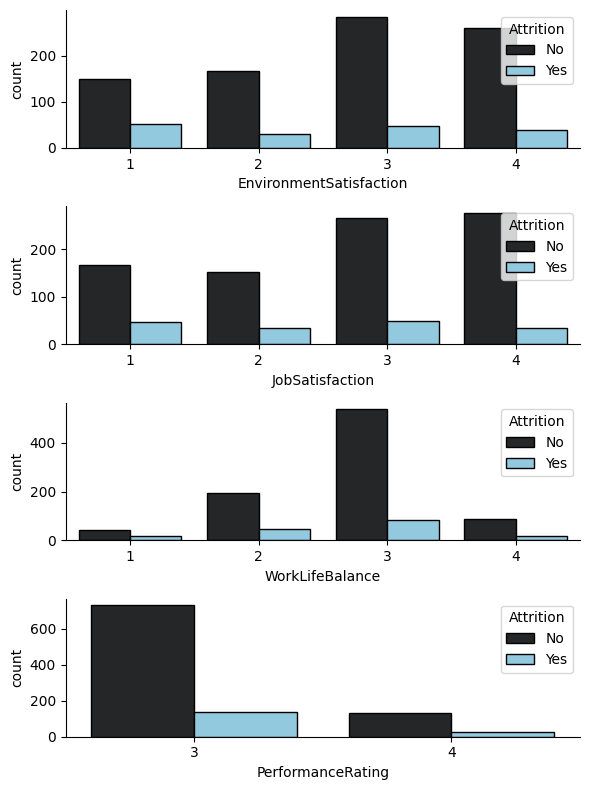

In [34]:
fig, axs = plt.subplots(4,figsize=(6,8))
i = 0
cols = ['EnvironmentSatisfaction', 'JobSatisfaction', 'WorkLifeBalance', 'PerformanceRating',]

for col in cols:
    x = col
    sns.countplot(ax=axs[i], data=dataset.sort_values(by='Attrition'), x=x, hue='Attrition', palette='dark:skyblue', edgecolor='black', fill=True)
    i=i+1

sns.despine()
plt.tight_layout()
plt.show()

# 5. Correlation

<Axes: >

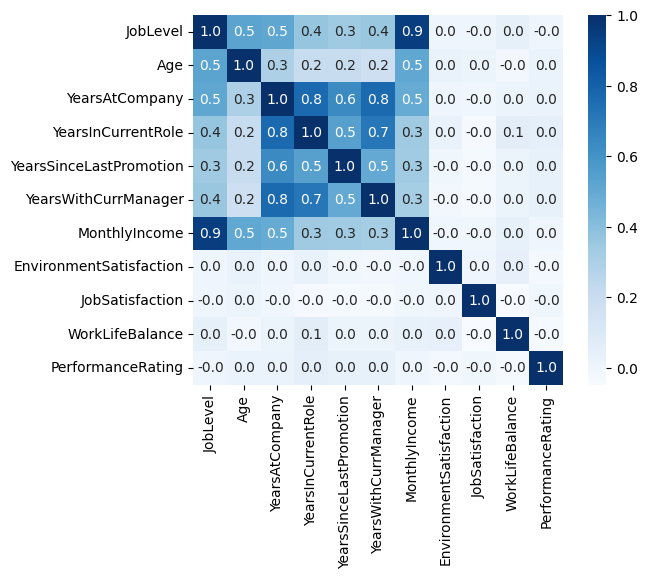

In [44]:
sns.heatmap(dataset.corr(numeric_only = True), cmap='Blues', annot=True, fmt=".1f", square=True)